# Introdução

Exemplo de regressão com Random Forest.

Objetivo: estimar a figura de mérito ZT a partir de dados de propriedades físicas de materiais termoelétricos.

Neste exemplo, vamos trabalhar com um conjunto de dados de materiais termoelétricos. Materiais termoelétricos são aqueles que convertem energia térmica em energia elétrica, com base nos efeitos Seebeck e Peltier. Esses materiais possuem inúmeras aplicações tecnológicas como: coletores solares e sistemas de resfriamento termoelétrico.  A Teoria do Funcional da Densidade (Density Functional Theory, DFT) pode ser utilizada para descrever propriedades eletrônicas de materiais naturais ou sintéticos, além de investigar relações com propriedades físicas dos materiais, como a condutividade elétrica e a condutividade térmica. Porém, a aplicação da DFT tipicamente se limita a materiais de poucas células unitárias, devido aos altos custos computacionais. Técnicas de aprendizado de máquina podem ser utilizadas para investigar relações entre propriedades físicas de materiais, de modo a descobrir materiais que sejam mais eficientes para uma determinada aplicação tecnológica.  
Um índice muito utilizado para medir a eficiência de materiais termoelétricos na transformação de calor em energia elétrica é a figura de mérito (ZT), uma quantidade adimensional. A figura de mérito é calculada da seguinte forma:

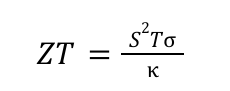


Onde S é o coeficiente de Seebeck, T é a temperatura absoluta, sigma é a condutividade elétrica e kapa é a condutividade térmica do material. Materiais termoelétricos eficientes são aqueles que apresentam ZT>1.
Base de dados: o conjunto de dados ESTM (experimentally synthesized thermoelectric materials) reúne dados experimentais de 880 materiais termoelétricos sintéticos, incluindo os seguintes atributos: composição química, coeficiente de Seebeck, condutividade elétrica, condutividade térmica, fator de poder e figura de mérito. Os dados estão disponíveis em https://github.com/KRICT-DATA/SIMD/tree/main/dataset.  
Referências:

Barua, N.K., Hall, E., Cheng, Y., Oliynyk, A.O. and Kleinke, H., 2024. Interpretable machine learning model on thermal conductivity using publicly available datasets and our internal lab dataset. Chemistry of Materials, 36(14), pp.7089-7100. https://doi.org/10.1021/acs.chemmater.4c01696

Na, G.S., Chang, H. A public database of thermoelectric materials and system-identified material representation for data-driven discovery. Comput Mater 8, 214 (2022). https://doi.org/10.1038/s41524-022-00897-2


In [1]:
# Importando as bibliotecas necessárias
import numpy as np # lidar com arrays
import pandas as pd # lidar com dataframes
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos

In [2]:
# Leitura de arquivo armazenado no Google Drive
# Obs: o arquivo precisa ser compartilhado para leitura
# https://docs.google.com/spreadsheets/d/1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap/edit?usp=sharing&ouid=100045855553146048631&rtpof=true&sd=true
import gdown

# IDs dos arquivos no Google Drive
file = {
    'filename': 'estm.xlsx',
    'file_id': '1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap'
}

# Trazer o arquivo para a área de trabalho do colab
url = f"https://drive.google.com/uc?id={file['file_id']}"
print(f"Baixando {file['filename']}...")
gdown.download(url, file['filename'], quiet=False)
print(f"{file['filename']} baixado com sucesso!")

Baixando estm.xlsx...


Downloading...
From: https://drive.google.com/uc?id=1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap
To: /content/estm.xlsx
100%|██████████| 1.99M/1.99M [00:00<00:00, 49.6MB/s]

estm.xlsx baixado com sucesso!


In [3]:
# Leitura do arquivo
df = pd.read_excel('estm.xlsx', header=1)
df.drop(['Formula', 'reference'], axis=1, inplace=True) # selecionando apenas as variáveis numéricas
df.rename(columns={'temperature(K)':'T', 'seebeck_coefficient(μV/K)':'S',
                   'electrical_conductivity(S/m)':'sigma', 'thermal_conductivity(W/mK)':'k',
                   'power_factor(W/mK2)':'P'}, inplace=True)
df.head()

,T,S,sigma,k,P,ZT
0,300.0,-110.0,27766.0,0.63,0.000336,0.159985
1,400.0,-138.0,23883.0,0.57,0.000455,0.319177
2,500.0,-163.0,20850.0,0.53,0.000554,0.522607
3,600.0,-181.0,19000.0,0.51,0.000622,0.732305
4,700.0,-193.0,17925.0,0.50,0.000668,0.940000


# Análise Exploratória

Já fizemos uma análise exploratória desse conjunto de dados em outra aula: https://colab.research.google.com/drive/1Lek92Oe8ZWU1W2mxQSg5dCPvka0uGP5h?usp=drive_link

Também já aplicamos uma regressão multilinear a esses dados em outra aula:
https://colab.research.google.com/drive/1g0sN85FTHlwzXmOBiZ3Bsmwn54KiteAQ?usp=drive_link

# Preparação dos dados

In [4]:
# Separação de variáveis preditoras e alvo
X = df.drop(['ZT'], axis=1) # features
y = df.ZT # target

# Partição dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

*Exercício: avalie mudanças no desempenho dos modelos para diferentes procedimentos de preparação de dados.*
*   *Utilizar outra estratégia de padronização ou normalização (MinMaxScaler, MaxAbsScaler)*
*   *Utilizar validação cruzada k-fold*










In [5]:
# Escalonando os preditores X
# Obs: use a função .inverse_transform se quiser reverter a transformação
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Regressão Multilinear

In [6]:
from sklearn.linear_model import Lasso, Ridge
a = 0.003
reglasso = Lasso(alpha=a)
reglasso.fit(X_train_s,y_train)
y_pred_train = reglasso.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = reglasso.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Lasso')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Lasso
Desempenho no conjunto de treino
R^2 =  0.44182875332600624
MSE =  0.06765585062376785
MAE =  0.195597539893777
Desempenho no conjunto de teste
R^2 =  0.4357558103500412
MSE =  0.06684097176671913
MAE =  0.19376989341409084


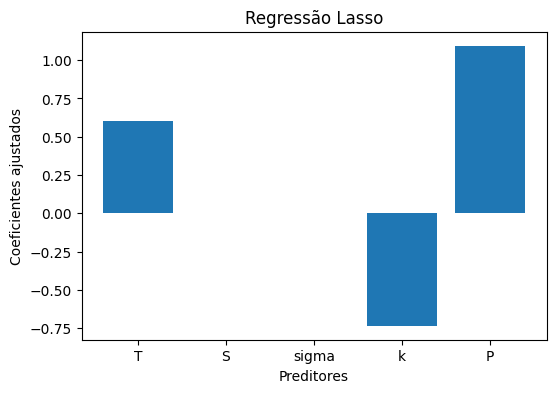

In [8]:
# Gráfico dos coeficientes ajustados
nomes = X.columns
coef = reglasso.coef_
plt.figure(figsize=(6, 4))
ax = plt.bar(np.arange(len(coef)), coef)
plt.xticks(ticks=np.arange(len(coef)), labels=nomes)
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.title("Regressão Lasso")
plt.show()

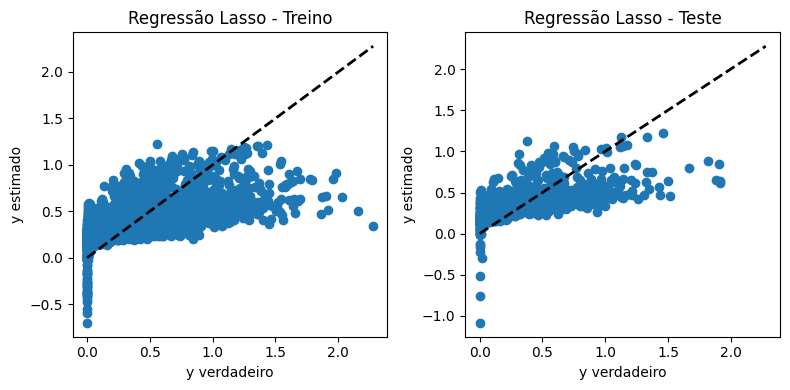

In [9]:
# Desempenho nos conjuntos de treino e teste
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(y_train, y_pred_train)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Regressão Lasso - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Regressão Lasso - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

# Random Forest

In [10]:
# Sem otimização de hiperparâmetros
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest sem otimização')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Random Forest sem otimização
Desempenho no conjunto de treino
R^2 =  0.9967649994517217
MSE =  0.0003921139169498554
MAE =  0.00883831622763469
Desempenho no conjunto de teste
R^2 =  0.9860997568527111
MSE =  0.001646637708994149
MAE =  0.020481626414970776


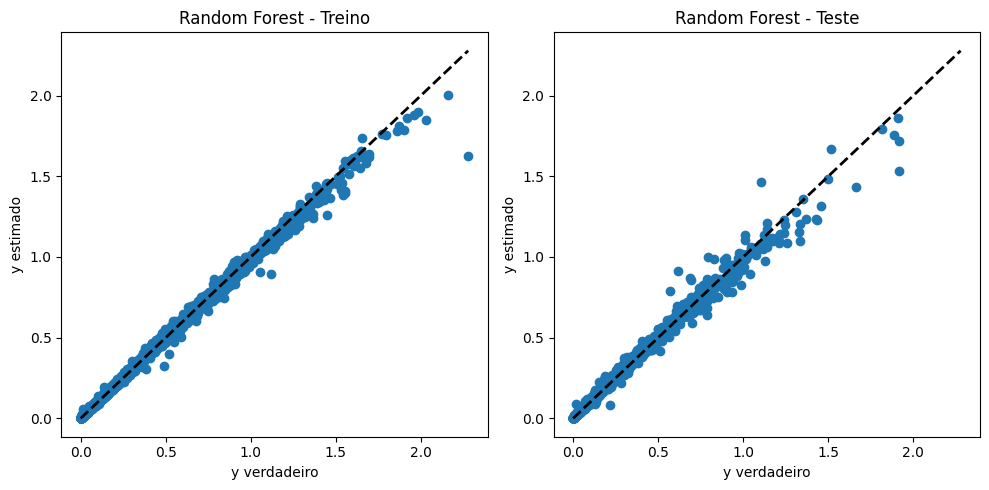

In [11]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

In [12]:
# Erro das amostras out-of-bag
rf = RandomForestRegressor(random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
print('OOB score:', rf.oob_score_)

OOB score: 0.9788506948923148


In [13]:
# Random forest otimizado utilizado grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train_s, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [14]:
# Aplica o modelo com hiperparâmetros otimizados
rf = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.9939115591542849
MSE =  0.0007379789748108204
MAE =  0.011033274834636059
Desempenho no conjunto de teste
R^2 =  0.9857967345414733
MSE =  0.001682534056925876
MAE =  0.020501694748363965


# Curva de aprendizagem

In [15]:
# Função para plotar curvas de aprendizagem

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),
                        param_name=None, param_range=None):
    """
    Generate 3 plots: the test and training error curve, the training
    samples vs. fit times curve, and the fit times vs. score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing the "fit" and "predict" methods;
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plots. If None, the figure and axes are created.

    ylim : tuple of shape (2,), default=None
        Defines the minimum and maximum y-values plotted.

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` is used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`.

    train_sizes : array-like of shape (n_ticks,), default=np.linspace(0.1, 1.0, 5)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum number of samples (that is, the number of
        samples in the training set determined by the splitting strategy of
        ``cv``). If it is int, it is regarded as the absolute number of training
        examples. Note that for classification the number of samples usually
        depends on the sampling strategy in ``cv``.

    param_name : str, default=None
        Name of the parameter to vary on the x-axis.

    param_range : array-like, default=None
        Values of the parameter to vary.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot fit_times vs. train_sizes
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_times vs. score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


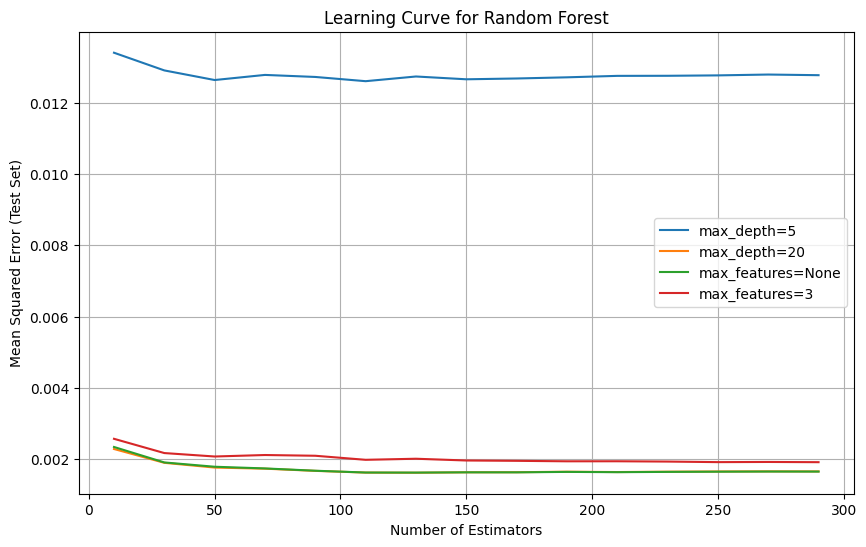

In [16]:
# Plota curva de aprendizagem
# (vai demorar uns 5min para rodar!)

# Definindo uma faixa n_estimators para explorar
n_estimators_range = np.arange(10, 301, 20)

# Armazena os dados das curvas de aprendizagem
results = {}

# Curva de aprendizagem para diferentes configurações de hiperparâmetros
settings = {
    #'default': RandomForestRegressor(random_state=42),
    'max_depth=5': RandomForestRegressor(max_depth=5, random_state=42),
    'max_depth=20': RandomForestRegressor(max_depth=20, random_state=42),
    'max_features=None': RandomForestRegressor(max_features=None, random_state=42),
    'max_features=3': RandomForestRegressor(max_features=3, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, estimator in settings.items():
    train_errors = []
    test_errors = []
    for n_estimators in n_estimators_range:
        estimator.set_params(n_estimators=n_estimators)
        estimator.fit(X_train_s, y_train)
        y_pred_train = estimator.predict(X_train_s)
        y_pred_test = estimator.predict(X_test_s)
        train_errors.append(mean_squared_error(y_train, y_pred_train))
        test_errors.append(mean_squared_error(y_test, y_pred_test))
    results[name] = {'train_error': train_errors, 'test_error': test_errors}

for name, errors in results.items():
    plt.plot(n_estimators_range, errors['test_error'], label=name)

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (Test Set)')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Importância de preditores

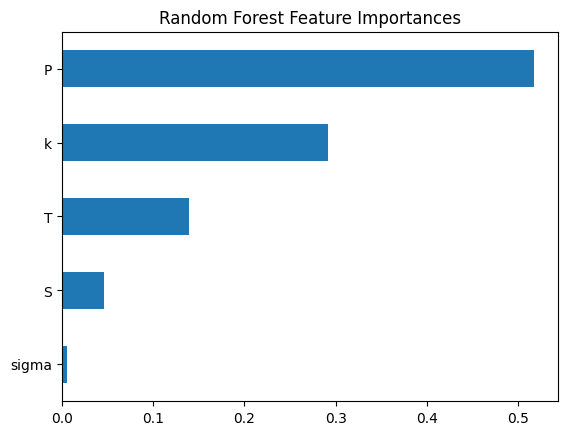

In [17]:
# Funcionalidade imbutida no RF, baseada na redução média na impureza
importances = rf.feature_importances_
nomes = df.drop(columns=["ZT"]).columns
pd.Series(importances, index=nomes).sort_values().plot.barh()
plt.title("Random Forest Feature Importances")
plt.show()

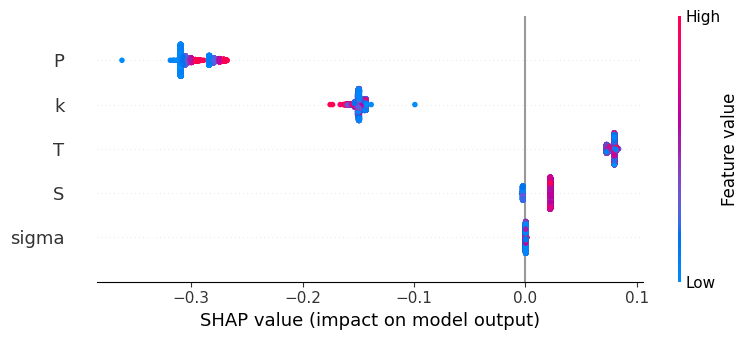

In [18]:
# SHAP (SHapley Additive exPlanations)
# Valor absoluto SHAP: indica a importância de cada preditor
# Sinal do SHAP: indica se o preditor contribui para aumento ou diminuição em ZT
# Cor: indica como cada preditor influencia no valor da variável alvo ZT
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=nomes)